# Numpy 기초

## Numpy

- Numerical Python
  - 대규모 다차원 배열을 다룰 수 있게 도와주는 라이브러리

```python
list(range(10))

import numpy as np
np.array([1, 2, 3, 4, 5])
# array([1, 2, 3, 4, 5])
```

```python
np.array([1, 2, 1.4, 4, 5])
# array([1. , 2. , 1.4, 4. , 5. ])
np.array([[1, 2],
          [3, 4]])
np.array([1, 2, 3, 4], dtype='float')
```

### 배열 데이터 타입 dtype

- Python list와 다르게 array는 단일타입으로 구성된다.

```python
arr = np.array([1, 2, 3, 4], dtype='float')
arr.dtype
# dtype('float64')
```

- dtype
  - int : 정수형 타입
    - i, int_, int32, int64, i8
  - float : 실수형 타입
    - f, float_, float32, float64, f8
  - str : 문자열 타입
    - str, U, U32
  - book : 불타입
    - ?, bool_

### 다양한 배열 반들기

```python
np.zeros(10, dtype=int)
# 0으로 이루어진 arr
np.ones((3, 5), dtype=float)
# 1로 이루어진 arr
np.arange(0, 20, 2)
# arr range
np.linspace(0, 1, 5)
# 숫자 사인 간격을 특정 수 만큼 존재하는 arr
```

### 난수로 채워진 배열 만들기

```python
np.random.random((2, 2))
# 랜덤하게 0~1 2*2 크기
np.random.normal(0, 1, (2, 2))
# 평균 0, 표준편차 1 크기 2*2 정규분포
np.random.randing(0, 10, (2, 2))
# 0 ~ 10까지 2*2크기
```

## 배열의 기초

```python
x2 = np.random.randint(10, size=(3, 4))

x2.ndim # 2
x2.shape # (3, 4)
x2.size # 12
x2.dtype # dtype('int64')

x2[0]
x2[0, 1]
x2[0:2, 1:4]
```

### 모양 바꾸기

- reshape: array의 shape를 변경한다

```python
x = np.arange(8)
x.shape
# (8, )
x2 = x.reshape((2, 4))
x2.shape
# (2, 4)
```

### 이어 붙이고 나누고

- concatenate: array를 이어 붙인다.

```python
x = np.array([0, 1, 2])
y = np.array([3, 4, 5])

np.concatenate([x, y])

```

- np.concatenate: axis축을 기준으로 이어붙일 수 있다.

```python
matrix = np.arange(4).reshpae(2, 2)
np.concatenate([matrix, matrix], axis = 0) # 세로
np.concatenate([matrix, matrix], axis = 1) # 가로
```

- np.split: axis 축을 기준으로 나눌 수 있다.

```python
matrix = np.arange(16).reshpae(4, 4)
upper, lower = np.split(matrix, [3], axis=0) # 위 아래
# 3 * 4, 1 * 4
upper, lower = np.split(matrix, [3], axis=1) # 왼 오른
# 4 * 3, 4 * 1
```

## numpy 연산

### 루프는 느리다

array의 모든 원소에 5를 더해서 만드는 함수

- 대충 for문을 구성하는 것보다 수십배로 빠르다

```python
x = np.arange(4)
x + 5
# array([5, 6, 7, 8])
x - 5
# array([- 5, -4, -3, -2])
x * 5
# array([0, 5, 10, 15])
x / 5
# array([0. , 0.2, 0.4, 0.6])
```

### 행렬간 연산

- 다차원 행렬에서도 적용가능하다.

```python
x = np.arange(4).reshpape((2, 2))
y = np.random.randint(10, size=(2, 2))

# 대충 선형대수 행렬간 연산
x + y

x - y
```

### 븍로드캐스팅

- Broadcasting: shape이 다른 array끼리 연산

```python
matrix = np.arange(9).reshape((3, 3))

matrix + 5
# 5 5 5
# 5 5 5
# 5 5 5
matrix + np.array([1, 2, 3])
# 1 2 3
# 1 2 3
# 1 2 3

# np.array([1], [2], [3]) -+ np.array([1, 2, 3])
np.arange(3).reshape((3, 1)) + np.arange(3)
# 0 0 0 + 0 1 2 = 0 1 2 
# 1 1 1 + 0 1 2 = 1 2 3
# 2 2 2 + 0 1 2 = 2 3 4
```

## 집계함수 & 마스킹 연산

### 직계함수

```python
x = np.arange(8).reshape((2, 4))
np.sum(x)  # 28
np.min(x)  # 0
np.max(x)  # 7
np.mean(x) # 3.5
```

```python
x = np.arange(8).reshape((2, 4))
np.sum(x, axis=0)
# array([ 4, 6, 8, 10])
np.sum(x, axis=1)
# array([ 6, 22])
```

```python
x = np.arange(5)
# array([0, 1, 2, 3, 4])
x < 3
# array([True, True, True, False, False])
x > 5
# array([False, False, False, False, False])
x[x < 3]
# array([0, 1, 2])
```

# pandas 기본 알아보기

## Pandas Series / DataFrame

구조화된 데이터를 효과적으로 처리하고 저장할 수 있는 차이썬 라이브러리. Array 계산에 특화된 numpy를 기반으로 만들어져서 다양한 기능들을 제공한다.

### Series 

- Series: numpy array 가 보강된 형태 Data와 Index를 가지고 있다.

```python
import pandas as pd

data = pd.Series([1, 2, 3, 4])
```

인덱스를 가지고 있고 인덱스로 접근 가능하다

```python
data = pd.Series([1, 2, 3, 4], index=['a', 'b', 'c', 'd'])
data['b']
```

딕셔너리로 만들 수 있다

```python
population_dict = {
    'korea': 5,
    'japan': 12,
    'china': 14,
    'usa' : 3
}
population = pd.Series(population_dict)
```

### DataFrame

여러개의 Series가 모여서 행과 열을 이룬 데이터

```python
population_dict = {
    'korea': 5,
    'japan': 12,
    'china': 14,
    'usa' : 3
}
gdp_dict = {
    'korea': 50,
    'japan': 120,
    'china': 140,
    'usa' : 30
}
population = pd.Series(population_dict)
gdp = pd.Series(gdp_dict)

country = pd.DataFrame({
    'population' : population,
    'gdp' : gdp
})
```

- 딕셔너리로 만들 수 있다.

```python
country.index
# Index(['china', 'japan', 'korea', 'usa'], dtype='object')
country.columns
# Index(['gdp', 'population'], dtype='object')

country['gdp']
type(country['gdp'])
```

- DataFrame
  - Series도 numpy array처럼 연산자를 쓸 수 있다.

```python
gdp_per_capita = country['gdp'] / country['population']
country['gdp per capita'] = gdp_per_capita
```

- 저장과 불러오기
  - 만든 데이터 프레임을 저장할 수 있다.

```python
country.to_csv("./country.csv")
country.to_excel("./country.xlsx")

country = pd.read_csv("./country.csv")
country = pd.read_excel("./country.xlsx")
```

## 인덱싱, 슬라이싱

### indexing / slicing

```python
country.loc['china']

country.loc['japan' : 'korea', :'population']

country.iloc[0]

ocuntry.iloc[1:3, :2]
```

### DataFrame 새 데이터 추가 / 수정

```python
df = pd.DataFrame(columns = ["이름", "나이", "주소"])

df.loc[0] = ["임원균", "26", "서울"]

df.loc[0, '이름'] = "영희"

df['전화번호'] = np.nan
df.loc[0, '전화번호'] = '01012341234'

df['이름']
df[["이름", "주소", "나이"]]
```

## pandas 연산과 함수

### 누락된 데이터 체크

```python

df.isnull()
df.notnull()

df.dropna()
# 데이터가 없으면 드랍
df['전화번호'] = df['전화번호'].fillna('전화번호 없음')
# 데이터가 없으면 체워넣기
```

### Series 연산

numpy array에서 사용했던 연산자들을 활용할 수 있다.

```python
A = pd.Series([2, 4, 6], index = [0, 1, 2])
B = pd.Series([1, 3, 5], index = [1, 2, 3])
A + B
A.add(B, fill_value=0)
```

### DataFrame 연산

- add(+), sub(-), mul(*), div(/)

```python
df_1 = pd.DatatFrame(np.random.randint(0, 10, (2, 2)), columns=list("AB"))
df_2 = pd.DatatFrame(np.random.randint(0, 10, (3, 3)), columns=list("BAC"))
df_1 + df_2
A.add(B, fill_value=0)
```

### 집계함수

- numpy array에서 사용했던 sum, mean등을 활용할 수 있다.

```python
data = {
    "A": [i+5 for i in range(3)],
    "B": [i**2 for i in range(3)]
}
df = pd.DataFrame(data)
df["A"].sum() # 18
df.sum()
# A 18
# B 5
df.mean()
# A 6.000
# B 1.667
```

## DataFrame 정렬하기

### 값으로 정렬하기

- sort_values()

```python
df.sort_values('col1', ascending = False)

df.sort_values(['col1', 'col2'], ascending = [False, True])
```


# Pandas 심화 알아보기

## 조건으로 검색하기

Numpy array와 마찬가지로 masking연산이 가능하다.

```python
import numpy as np
import pandas as pd

df = pd.DataFrame(np.random.rand(5, 2), columns=["A", "B"])
df["A"] < 0.5
```

조건에 맞는 DatatFrame row를 추출 가능하다.

```python
import numpy as np
import pandas as pd

df = pd.DataFrame(np.random.rand(5, 2), columns=["A", "B"])
df[(df["A"] < 0.5) & (df["B"] > 0.3)] # 비트연산자 오 ㄳ
df.query("A < 0.5 and B > 0.3")
```

문자열이라면 다른 방식으로도 조건이 검색이 가능하다.

```python
df['Animal'].str.contains("Cat")
df.Animal.str.match("Cat")
```

## 함수로 데이터 처리하기

apply를 통해 함수로 데이터를 다룰 수 있다.

```python
df = pd.DataFrame(np.arange(5), columns=["Num"])
def square(x): return x**2
df["Num"].apply(square)
df["Square"] = df.Num.apply(lambda x: x ** 2)
```

- mapping_dict

```python
def get_preprocess_phone(phone):
    mapping_dict = {
        "공" : "0",
        ...
    }
    for k, v in mapping_dict.items()
        phone = phone.replace(k, v)
    return phone

df["preprocess_phone"] = df["phone"].apply(get_preprocessed_phonenumber)
```

replace: apply 기능에서 데이터 값만 대체하고 싶을 때

```python
df.Sex.replace({"Male": 0, "Female": 1})
df.Sex.replace({"Male": 0, "Female": 1}, inplace=True)
```

## 끄룹으로 묶기

간단한 집계를 넘어 조건부로 집계하고 싶은 경우

```python
df = pd.DataFrame({
    "key" : ["A", "B", "C", "A", "B", "C"],
    "data" : [1, 2, 3, 1, 2, 3],
    "data2" : np.random.randint(0, 6, 6)
})
df.groupby("key")
df.groupby("key").sum()
#      data  data2
# key             
# A       2      6
# B       4      8
# C       6      7
df.groupby(["key", "data"]).sum()
#           data2
# key data       
# A   1         9
# B   2         7
# C   3         5
```

### aggregate

groupby를 통해서 집계를 한번에 계산하는 방법

```python
df.groupby('key').aggregate(['min', np.median, max])
#     data            data2           
#      min median max   min median max
# key                                 
# A      1      1   1     2    2.5   3
# B      2      2   2     2    3.5   5
# C      3      3   3     0    0.0   0
df.groupby('key').aggregate({'data1': 'min', "data2": np.sum})
#      data  data2
# key             
# A       1      5
# B       2      7
# C       3      0
```

### filter

groupby 를 통해서 그룹 속성을 기준으로 데이터 필터링
```python
df.groupby('key').mean()
df.groupby('key').filter(lambda x: x["data2"].mean() > 3)
def filter_by_mean(x): return x["data2"].mean() > 3
df.groupby('key').filter(filter_by_mean)
```

### apply

groupby를 통해서 묶인 데이터 함수 적용

```python
df.groupby('key').apply(lambda x: x.max() - x.min())
```

### get_group

groupby로 묶인 데이터에서 key값으로 데이터를 가져올 수 있다.
```python
df = df.read_csv('')
df.head()
df.groupby("시도").get_group("충남")
len(df.groupby("시도").get_group("충남"))
```

## Multiindex & pivot_table

### Multiindex

인덱스를 계층적으로 만들 수 있다.

```python
df = pd.DataFrame(
    np.random.randn(4, 2),
    index=[["A", "A", "B", "B"], [1, 2, 1, 2]],
    columns=["data1", "data2"]
)
#         data1     data2
# A 1  0.418425 -1.510049
#   2  1.120373 -0.733300
# B 1 -0.806347 -0.660075
#   2 -0.136402 -0.260051
```

열 인덱스도 계층적으로 만들 수 있다.

```python
df = pd.DataFrame(
    np.random.randn(4, 4),
    columns=[["A", "A", "B", "B"], [1, 2, 1, 2]],
)
#           A                   B          
#           1         2         1         2
# 0  0.739158  0.160406 -0.995104  0.061614
# 1 -1.313889  0.924546 -0.785150 -0.983709
# 2 -0.286554 -0.822356 -0.815456  0.660427
# 3  1.323018  0.536623  0.389717  0.758934
```

- 다중 인덱스 컬럼의 경우 인덱싱은 계층적으로 한다.
- 인덱스 탐색의 경우애는 loc, iloc를 사용 가능하다.

```python
df["A"]
df["A"]["1"]
```

### pivot_table

데이터에서 필요한 자료만 뽑아서 새롭게 요약, 분석할 수 있는 기능 엑셀에서 피봇 테이블과 같다.

- index는 행 인덱스로 들어갈 key
- column에 열 인덱스로 라벨링될 값
- value에 분석할 데이터

타이타닉 데이터에서 성별과 좌석별 생존률 구하기

```python
df.pivot_table(
    index = 'sex', columns = 'class', values = 'survived',
    aggfunc = np.mean
)
```

```python
df.pivot_table(
    index = '월별', columns='내역', values=['수입', '지출']
)
```


# Matplotlib

파이썬에서 데이터를 그래프나 차트로 시각화 할 수 있는 라이브러리

Text(0, 0.5, 'y')

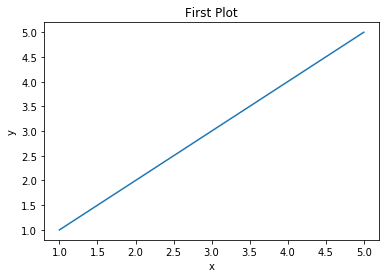

In [2]:
import matplotlib.pyplot as plt

x = [1, 2, 3, 4, 5]
y = [1, 2, 3, 4, 5]
plt.plot(x, y)
plt.title("First Plot")
plt.xlabel("x")
plt.ylabel("y")

## 그래프 그려보기

![](image/044_001.png)

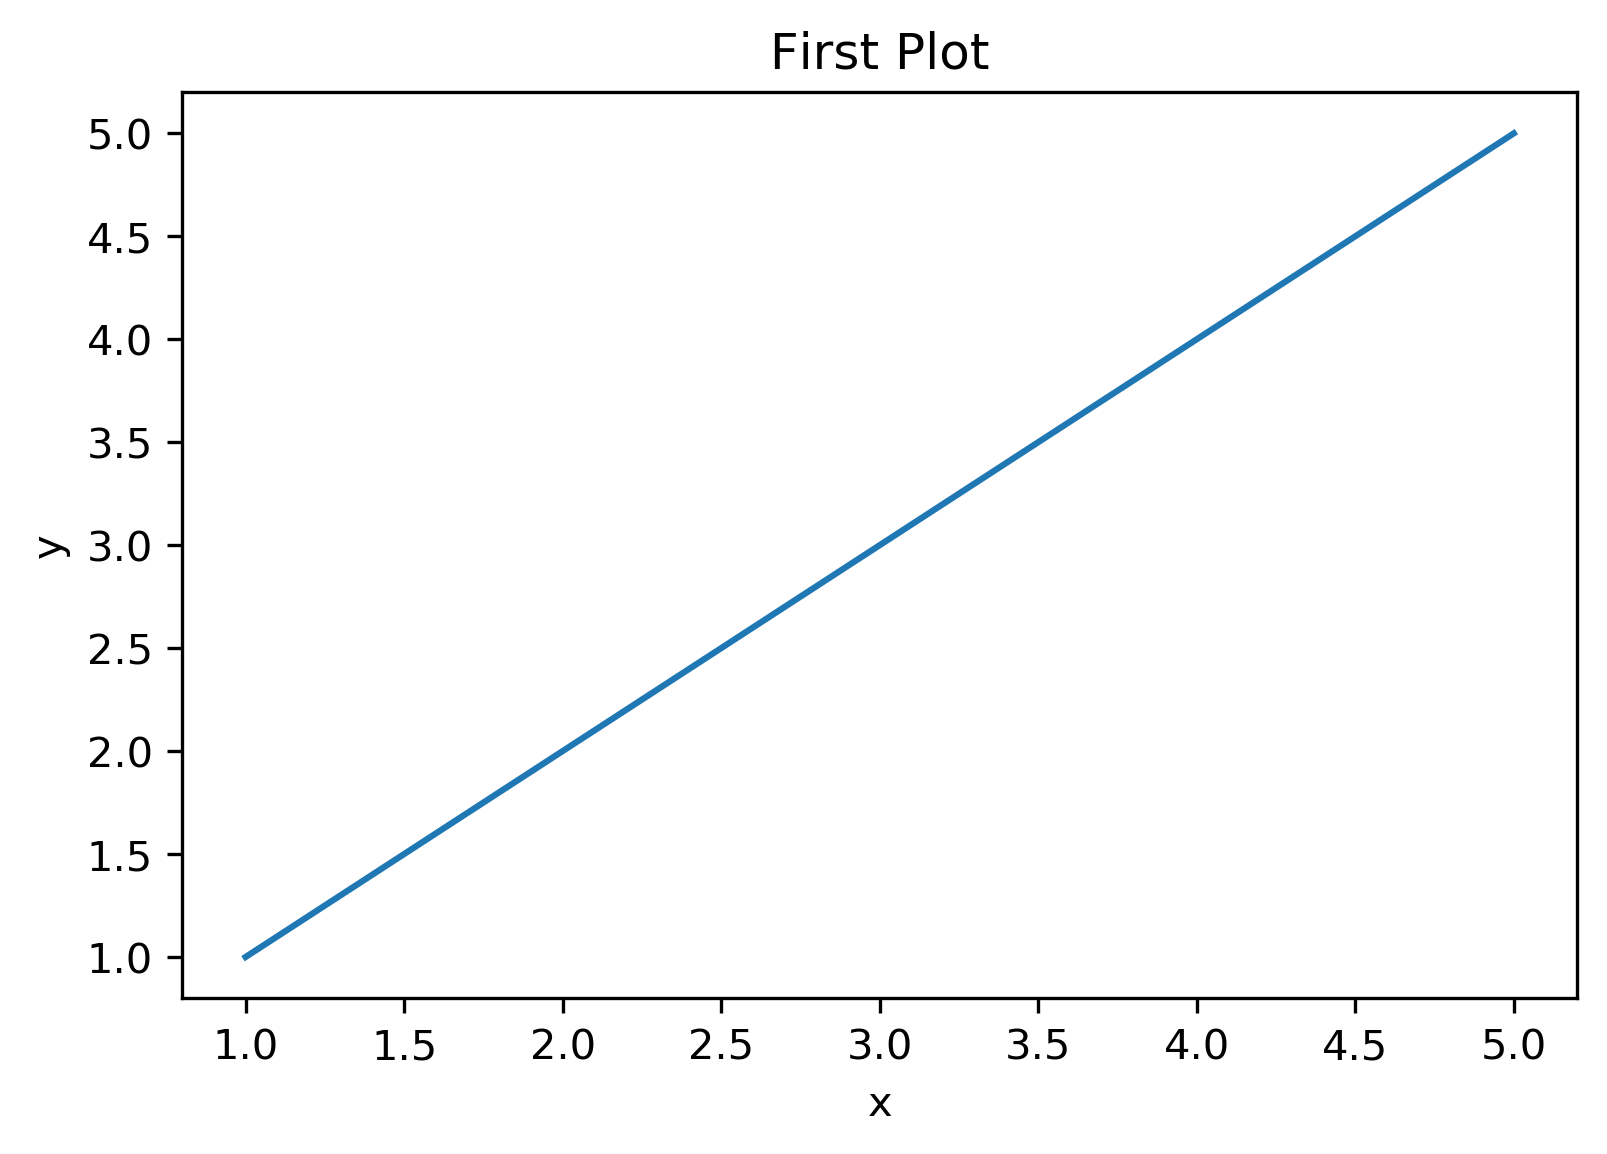

In [12]:
import matplotlib.pyplot as plt

x = [1, 2, 3, 4, 5]
y = [1, 2, 3, 4, 5]
fig, ax = plt.subplots()
ax.plot(x, y)
ax.set_title("First Plot")
ax.set_xlabel("x")
ax.set_ylabel("y")
fig.set_dpi(300)
# fig.savefig("first_plot.png")

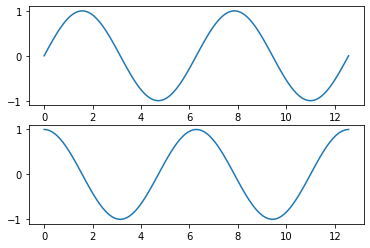

In [13]:
import numpy as np

x = np.linspace(0, np.pi*4, 100)
fig, axes = plt.subplots(2, 1)
axes[0].plot(x, np.sin(x))
axes[1].plot(x, np.cos(x))

## matplotlib 그래프들

### Line Plot

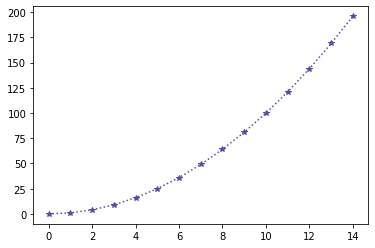

In [14]:
fig, ax = plt.subplots()
x = np.arange(15)
y = x**2
ax.plot(
    x, y,
    LineStyle=":",
    marker="*",
    color="#524FA1"
)

### Line style

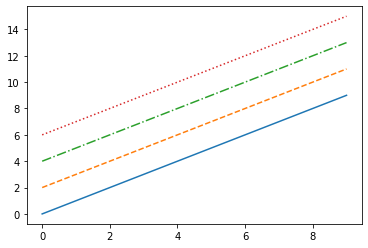

In [16]:
x = np.arange(10)
fig, ax = plt.subplots()
ax.plot(x, x, linestyle="-")
ax.plot(x, x+2, linestyle="--")
ax.plot(x, x+4, linestyle="-.")
ax.plot(x, x+6, linestyle=":")

### Color

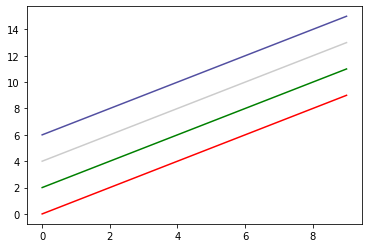

In [18]:
x = np.arange(10)
fig, ax = plt.subplots()
ax.plot(x, x, color="r")
ax.plot(x, x+2, color="green")
ax.plot(x, x+4, color="0.8")
ax.plot(x, x+6, color="#524FA1")

### Marker

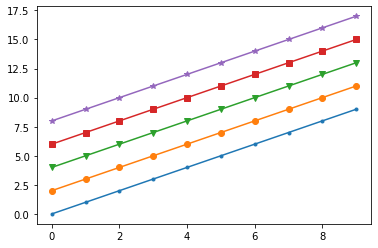

In [19]:
x = np.arange(10)
fig, ax = plt.subplots()
ax.plot(x, x, marker=".")
ax.plot(x, x+2, marker="o")
ax.plot(x, x+4, marker="v")
ax.plot(x, x+6, marker="s")
ax.plot(x, x+8, marker="*")

### 축 경계 조정하기

(-1.5, 1.5)

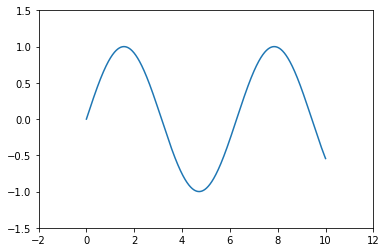

In [20]:
x = np.linspace(0, 10, 1000)
fig, ax = plt.subplots()
ax.plot(x, np.sin(x))
ax.set_xlim(-2, 12)
ax.set_ylim(-1.5, 1.5)

### 범례

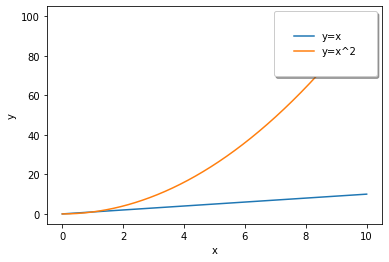

In [21]:
fig, ax = plt.subplots()
ax.plot(x, x, label='y=x')
ax.plot(x, x**2, label='y=x^2')
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.legend(
    loc='upper right',
    shadow=True, 
    fancybox=True,
    borderpad=2
)

## Scatter

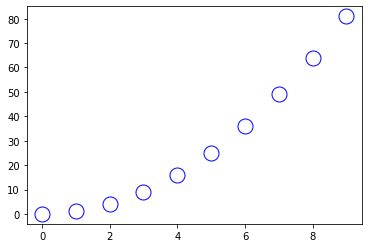

In [22]:
fig, ax = plt.subplots()
x = np.arange(10)
ax.plot(
    x, x**2, 'o',
    markersize=15, 
    markerfacecolor='white',
    markeredgecolor='blue'
)

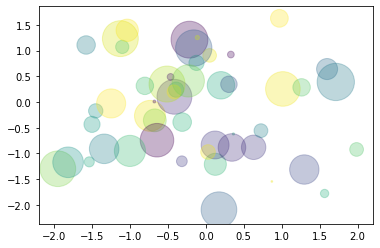

In [25]:
fig, ax = plt.subplots()
x = np.random.randn(50)
y = np.random.randn(50)
colors = np.random.randint(0, 100, 50)
sizes = 500 * np.pi * np.random.rand(50) ** 2
ax.scatter(
    x, y,
    c=colors,
    s=sizes,
    alpha=0.3
)

## Bar & Histogram

### Bar plot

<BarContainer object of 10 artists>

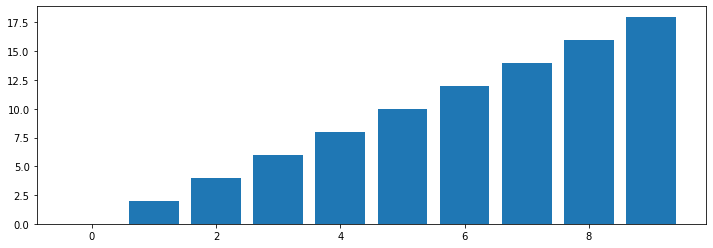

In [26]:
x = np.arange(10)
fig, ax = plt.subplots(figsize=(12, 4))
ax.bar(x, x*2)

[Text(0, 0, 'A'), Text(0, 0, 'B'), Text(0, 0, 'C')]

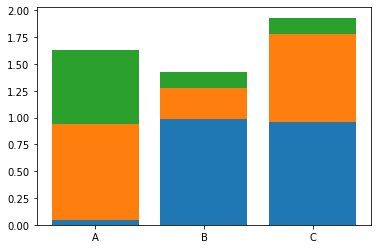

In [27]:
x = np.random.rand(3)
y = np.random.rand(3)
z = np.random.rand(3)
data = [x, y, z]

fig, ax = plt.subplots()
x_ax = np.arange(3)
for i in x_ax:
    ax.bar(x_ax, data[i], bottom=np.sum(data[:i], axis=0))
ax.set_xticks(x_ax)
ax.set_xticklabels(["A", "B", "C"])

[Text(0, 0, 'A'), Text(0, 0, 'B'), Text(0, 0, 'C')]

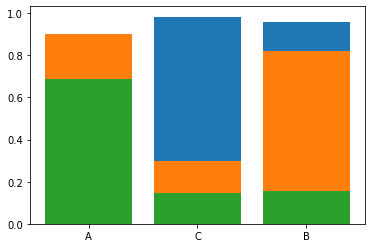

In [31]:
fig, ax = plt.subplots()
x_ax = np.arange(3)
for i in x_ax:
    ax.bar(x_ax, data[i])
ax.set_xticks([0, 2, 1])
ax.set_xticklabels(["A", "B", "C"])

### Histogram

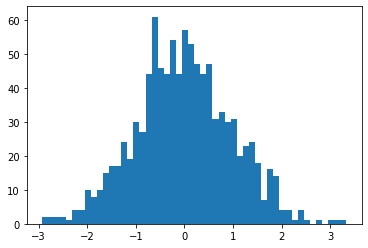

In [33]:
fig, ax = plt.subplots()
data = np.random.randn(1000)
ax.hist(data, bins=50)
plt.show()

### Matplotlib with Pandas

In [37]:
df = pd.read_csv("./president_heights.csv")
fig, ax = plt.subplots()
ax.plot(df["order"], df["height(cm)"], label="height")
ax.set_xlabel("order")
ax.set_ylabel("height(cm)")

NameError: name 'pd' is not defined

![](image/044_002.png)

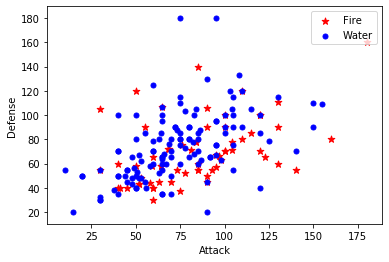

In [43]:
import pandas as pd
df = pd.read_csv("./data/pokemon.csv")

fire = df[(df["Type 1"] == 'Fire') | (df["Type 2"] == "Fire")]
water = df[(df['Type 1'] == 'Water') | (df['Type 2'] == "Water")]
fig, ax = plt.subplots()
ax.scatter(fire['Attack'], fire['Defense'], color="R",
            label="Fire", marker="*", s=50)
ax.scatter(water['Attack'], water["Defense"], color="B", label="Water", s=25)
ax.set_xlabel("Attack")
ax.set_ylabel("Defense")
ax.legend(loc="upper right")